# Wine

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pandas.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine2 = wine.drop(columns = "class")
wine2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Réalisation de la CAH

In [4]:
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(scale(wine2))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [5]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

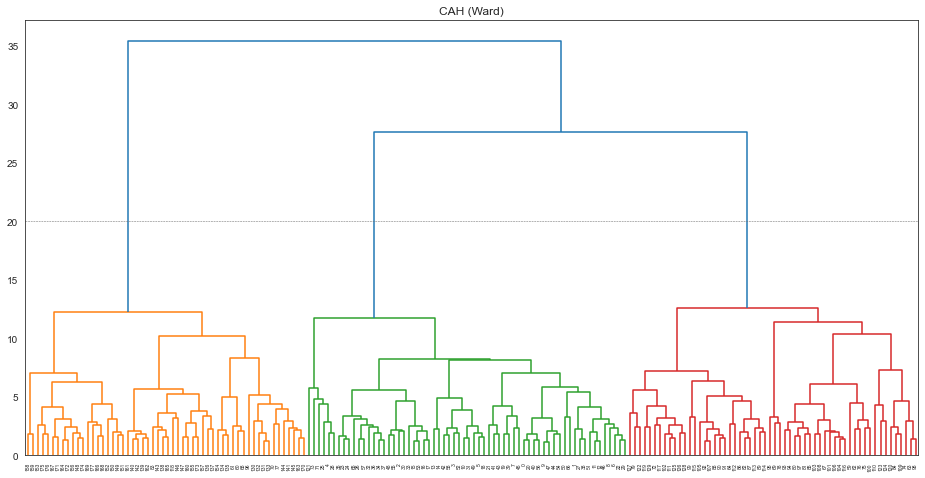

In [6]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

Le dendrogramme suggère **3 classes**

In [7]:
hac3 = AgglomerativeClustering(n_clusters = 3)
hac3.fit(scale(wine2))

AgglomerativeClustering(n_clusters=3)

On peut donc caractériser les classes (on ne retient que les points importants) :

- **0** : Faible taux d'alcool, faible taux de magnésium, faible intensité de couleur et faible valeur pour *Proline*
- **1** : (très) Fort taux d'acide malique, faible taux de phénols, de flavanoïdes de proanthocyanins et teinte (*hue*) pâle, forte intensité de couleur, et valeurs de OD280/OD315 (très) faible
- **2** :  faible alcalinité, beaucoup de phénols, flavanoïdes et proanthocyanins, fortes valeurs pour *Proline*

In [8]:
wine2.assign(classe = hac3.labels_).groupby("classe").mean().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
classe,,,,,,,,,,,,,
0,12.20,1.94,2.22,20.21,92.55,2.26,2.09,0.36,1.69,2.90,1.06,2.86,501.43
1,13.06,3.17,2.41,21.00,99.86,1.69,0.85,0.45,1.13,6.85,0.72,1.73,624.95
2,13.67,1.97,2.46,17.53,106.16,2.85,3.01,0.29,1.91,5.45,1.07,3.16,1076.05


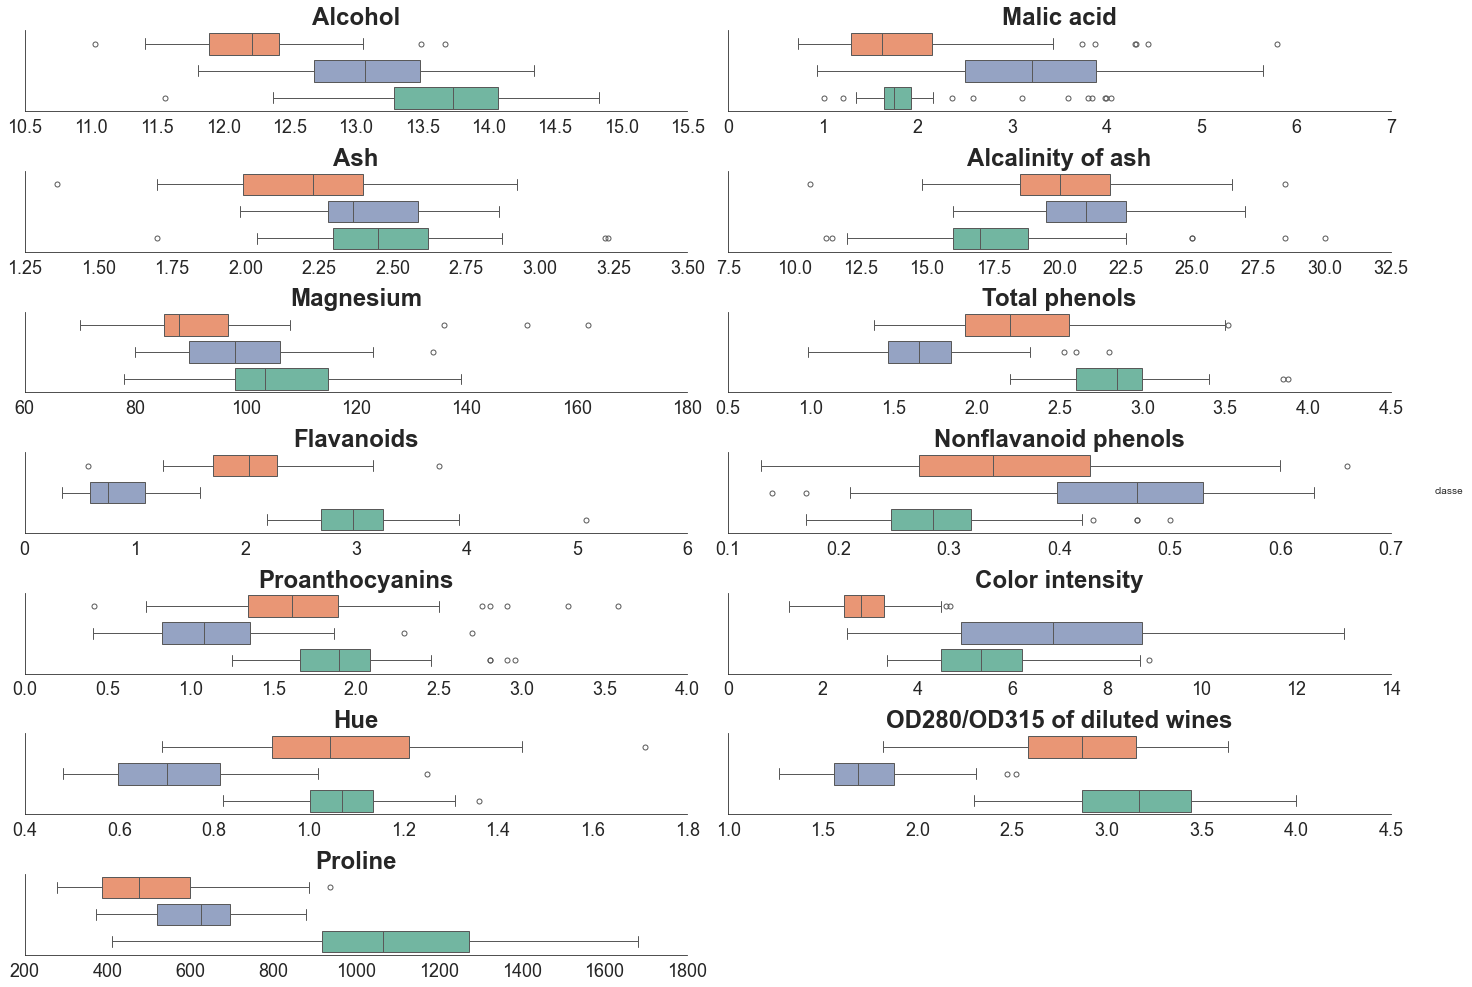

In [9]:
g = seaborn.catplot(
    data = wine2.assign(classe = [str(v) for v in hac3.labels_]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe", hue = "classe",
    kind = "box",
    col = "variable", col_wrap = 2, sharex = False, order = ["0", "1", "2"],
    height = 2, aspect = 5, palette = "Set2"
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.set_yticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "", y_var = "")
plt.show()

In [10]:
pandas.crosstab(hac3.labels_, wine["class"])

class,1,2,3
row_0,,,
0,0,58,0
1,0,8,48
2,59,5,0


## Réalisation de $k$-means

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(wine2))
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (wine2.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

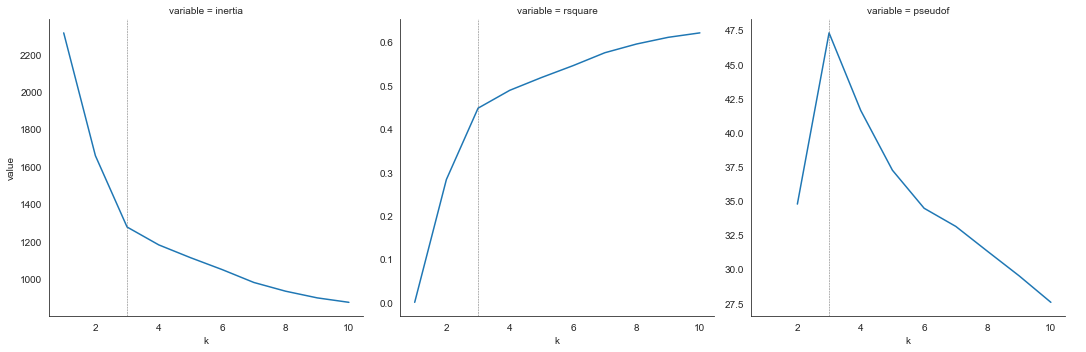

In [12]:
g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
g.map(plt.axvline, x = 3, linewidth = .5, color = "dimgray", linestyle = "--")
g.add_legend()
plt.show()

Ici aussi, on choisit **3 classes**

In [13]:
kmeans3 = KMeans(n_clusters = 3, n_init = 10)
kmeans3.fit(scale(wine2))

KMeans(n_clusters=3, n_init=10)

On retrouve sensiblement les mêmes classes (pas forcément dans le même ordre)

In [14]:
wine2.assign(classe = kmeans3.labels_).groupby("classe").mean().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
classe,,,,,,,,,,,,,
0,13.13,3.31,2.42,21.24,98.67,1.68,0.82,0.45,1.15,7.23,0.69,1.70,619.06
1,13.68,2.00,2.47,17.46,107.97,2.85,3.00,0.29,1.92,5.45,1.07,3.16,1100.23
2,12.25,1.90,2.23,20.06,92.74,2.25,2.05,0.36,1.62,2.97,1.06,2.80,510.17


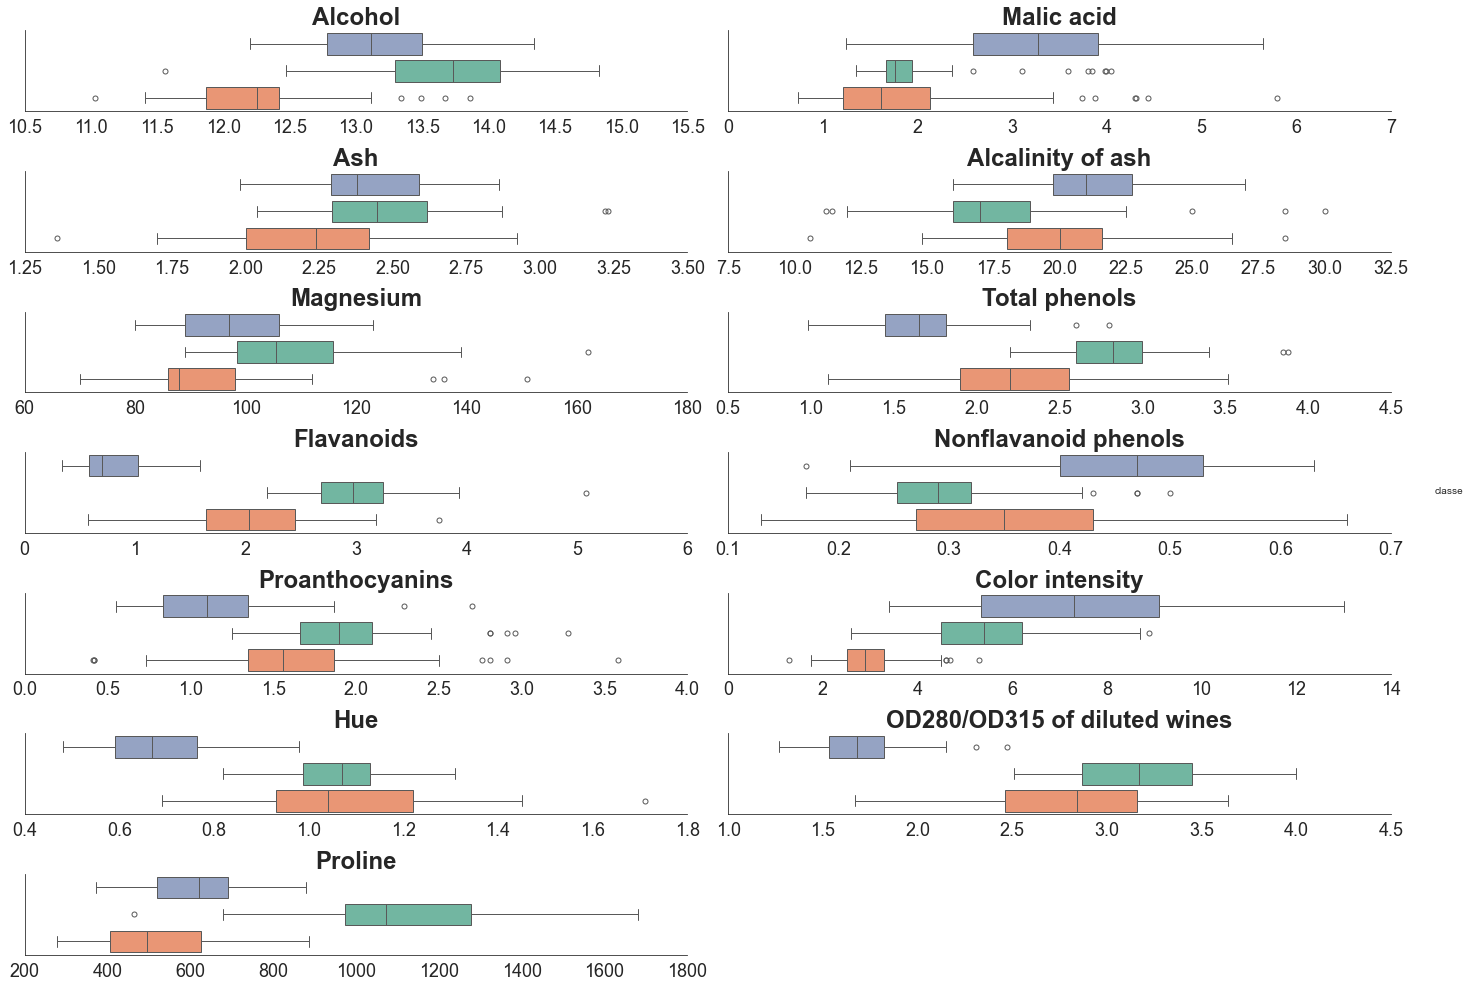

In [15]:
g = seaborn.catplot(
    data = wine2.assign(classe = [str(v) for v in kmeans3.labels_]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe", hue = "classe",
    kind = "box",
    col = "variable", col_wrap = 2, sharex = False, order = ["0", "1", "2"],
    height = 2, aspect = 5, palette = "Set2"
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.set_yticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "", y_var = "")
plt.show()

In [16]:
pandas.crosstab(kmeans3.labels_, wine["class"])

class,1,2,3
row_0,,,
0,0,3,48
1,59,3,0
2,0,65,0


## Réalisation de DBSCAN

In [17]:
dbscan = DBSCAN(eps = 3)
dbscan.fit(scale(wine2))

DBSCAN(eps=3)

In [18]:
pandas.Series(dbscan.labels_).value_counts()

 0    167
-1     11
Name: count, dtype: int64

In [19]:
wine2.assign(classe = dbscan.labels_).groupby("classe").mean().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
classe,,,,,,,,,,,,,
-1,12.44,1.99,2.31,20.84,118.64,2.52,2.09,0.31,2.35,4.83,0.94,2.68,656.55
0,13.04,2.36,2.37,19.41,98.50,2.28,2.03,0.37,1.54,5.07,0.96,2.61,752.84


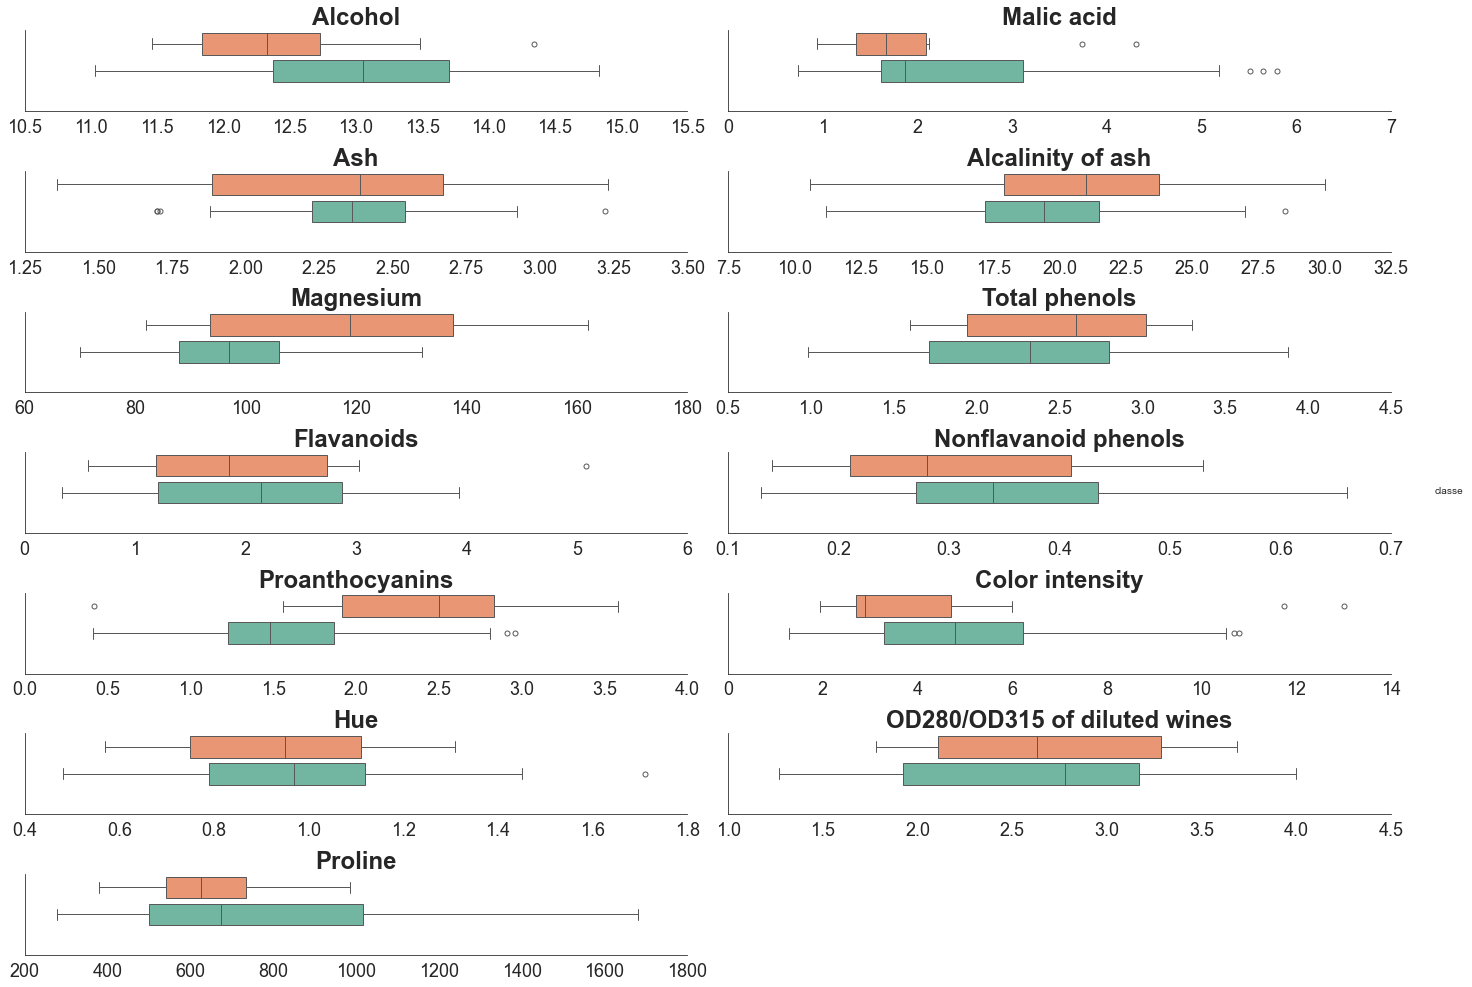

In [20]:
g = seaborn.catplot(
    data = wine2.assign(classe = [str(v) for v in dbscan.labels_]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe", hue = "classe",
    kind = "box",
    order = ["-1", "0", "1"],
    col = "variable", col_wrap = 2, sharex = False,
    height = 2, aspect = 5, palette = "Set2"
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.set_yticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "", y_var = "")
plt.show()

## Comparaison des partitions

In [21]:
tab = pandas.crosstab(kmeans3.labels_, hac3.labels_)
tab.index.name = "Kmeans"
tab.columns.name = "HAC"
tab

HAC,0,1,2
Kmeans,,,
0,0,51,0
1,1,0,61
2,57,5,3


In [22]:
tab = pandas.crosstab(kmeans3.labels_, dbscan.labels_)
tab.index.name = "Kmeans"
tab.columns.name = "DBCAN"
tab

DBCAN,-1,0
Kmeans,,
0,2,49
1,3,59
2,6,59


In [23]:
tab = pandas.crosstab(hac3.labels_, dbscan.labels_)
tab.index.name = "HAC"
tab.columns.name = "DBSCAN"
tab

DBSCAN,-1,0
HAC,,
0,6,52
1,3,53
2,2,62


## Représentation sur le plan factoriel de l'ACP

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scale(wine2))

PCA(n_components=2)

In [25]:
wine_pca_row = pandas.DataFrame(pca.transform(scale(wine2)), columns = ["Dim1", "Dim2"])

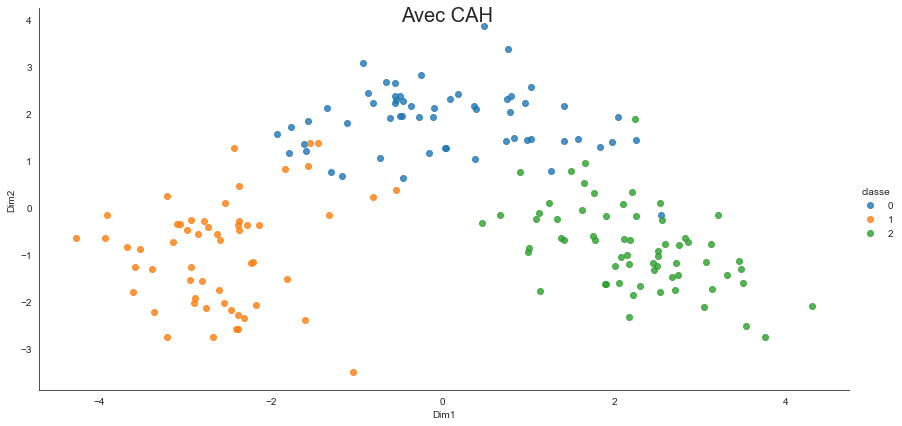

In [26]:
g_pca = seaborn.lmplot(
    data = wine_pca_row.assign(classe = hac3.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec CAH", size = 20)

plt.show()

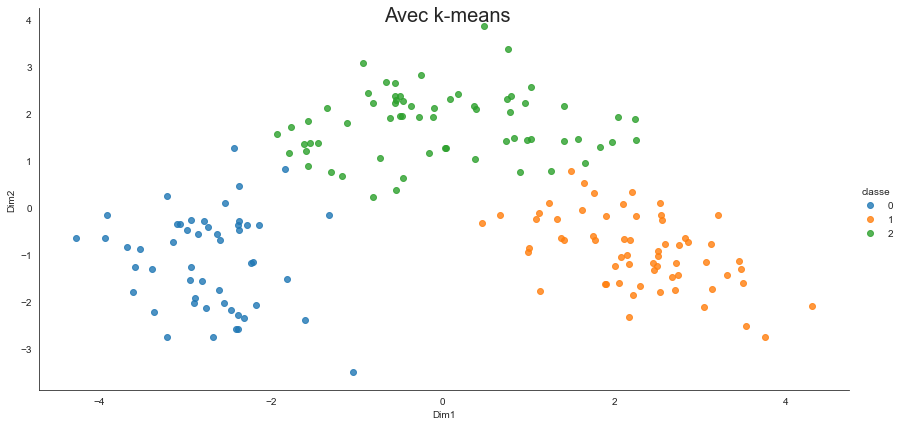

In [27]:
g_pca = seaborn.lmplot(
    data = wine_pca_row.assign(classe = kmeans3.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec k-means", size = 20)

plt.show()

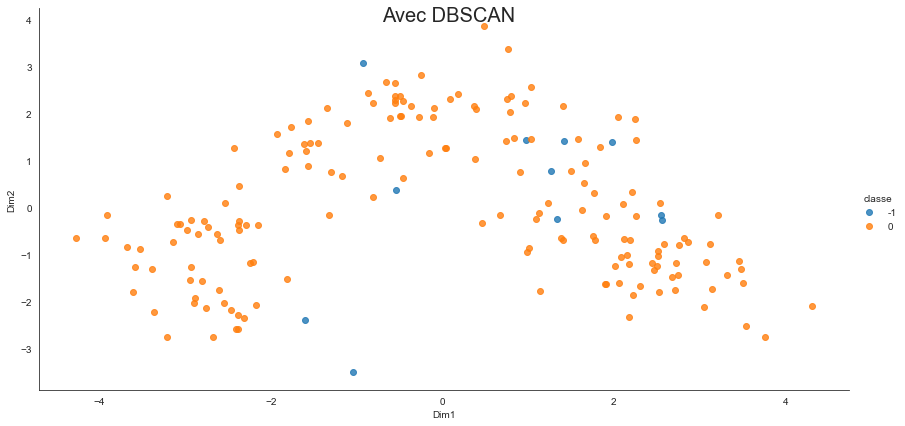

In [28]:
g_pca = seaborn.lmplot(
    data = wine_pca_row.assign(classe = dbscan.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)

g_pca.fig.suptitle("Avec DBSCAN", size = 20)

plt.show()